In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [3]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
#df

In [4]:
df.dtypes

Player Name                              object
Team                                     object
Year                                    float64
Rookie Contract (Y/N)                    object
Contract Length                         float64
Total Pay                               float64
Yearly Pay (AAV)                        float64
Team Payroll                            float64
Player Percentage of Payroll            float64
Games Played                            float64
Snaps Played                            float64
Backfield Snaps                         float64
Slot Snaps                              float64
Wide snaps                              float64
QB Pressure Allowed (PR)                float64
Total Pressure Oppurtnuties (OPP)       float64
Rush Attempts                           float64
Rush Yards                              float64
Rush YPA                                float64
Rush TDs                                float64
Rush Yac (YCO)                          

In [5]:
dfdrop = df[df['AAV Adjusted'] != '#VALUE!']

#dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
#dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace(',', '', regex=True).astype(float)

result = dfdrop.groupby('Year')['AAV Adjusted'].mean()
result


Year
2006.0    4.942361e+06
2007.0    5.515339e+06
2008.0    6.061547e+06
2009.0    5.333065e+06
2010.0    4.180221e+06
2011.0    4.319299e+06
2012.0    6.471811e+06
2013.0    5.129489e+06
2014.0    3.659193e+06
2015.0    3.516669e+06
2016.0    3.033273e+06
2017.0    4.223205e+06
2018.0    3.682922e+06
2019.0    4.329725e+06
2020.0    5.004288e+06
2021.0    4.631649e+06
2022.0    5.137960e+06
Name: AAV Adjusted, dtype: float64

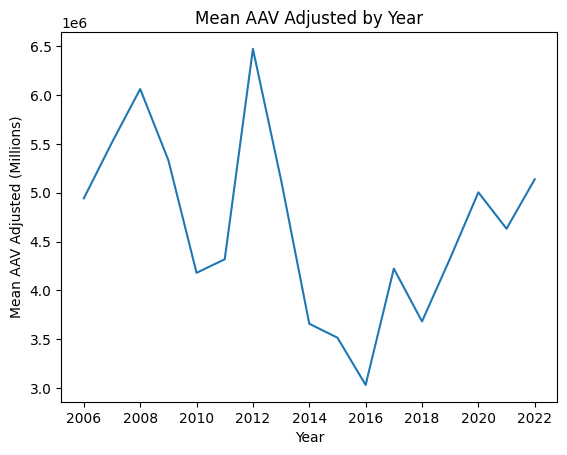

In [6]:
plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

plt.show()

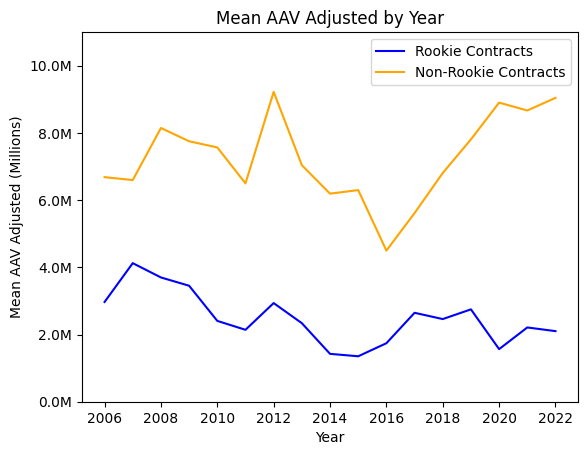

In [7]:
df_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']
df_not_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'N']

result_rook = df_rook.groupby('Year')['AAV Adjusted'].mean()
result_not_rook = df_not_rook.groupby('Year')['AAV Adjusted'].mean()

plt.plot(result_rook.index, result_rook.values, label='Rookie Contracts', color='blue')
plt.plot(result_not_rook.index, result_not_rook.values, label='Non-Rookie Contracts', color='orange')

plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.ylim(0, 11_000_000)  

plt.legend()

plt.show()

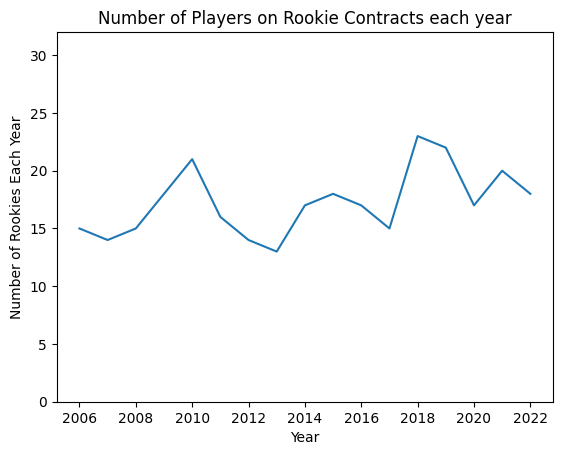

In [8]:
rookie_contract_df = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']

result = rookie_contract_df.groupby('Year')['Rookie Contract (Y/N)'].count()

plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Number of Rookies Each Year')
plt.title('Number of Players on Rookie Contracts each year')
plt.ylim(0, 32)

plt.show()

In [9]:
dfx10 = pd.concat([df06, df07, df08, df09, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
dfdropx10 = dfx10[dfx10['AAV Adjusted'] != '#VALUE!']

#dfdropx10['Payroll Adjusted'] = dfdropx10['Payroll Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
result = dfdropx10.groupby('Year')['Payroll Adjusted'].mean()
result

Year
2006.0    1.553460e+08
2007.0    1.614290e+08
2008.0    1.654160e+08
2009.0    1.760130e+08
2011.0    1.555889e+08
2012.0    1.717324e+08
2013.0    1.620684e+08
2014.0    1.712241e+08
2015.0    1.826687e+08
2016.0    1.936811e+08
2017.0    2.033375e+08
2018.0    2.169565e+08
2019.0    2.253800e+08
2020.0    2.375068e+08
2021.0    2.134906e+08
2022.0    2.180443e+08
Name: Payroll Adjusted, dtype: float64

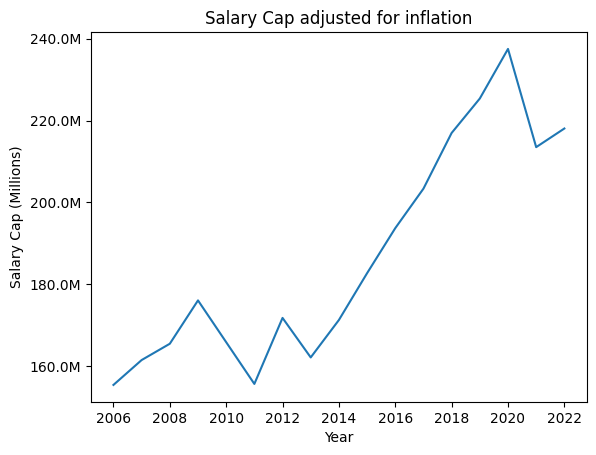

In [10]:
plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Salary Cap (Millions)')
plt.title('Salary Cap adjusted for inflation')
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

In [11]:
result = dfdropx10.groupby('Year')['Payroll Adjusted'].mean()


In [12]:
result.index.get_loc(2006)

0

In [13]:
if 2008 in result.index and 2022 in result.index:
    initial_value = result.loc[2006]
    final_value = result.loc[2020]

    # Check if the initial value is not 0
    if initial_value != 0:
        # Calculate the percentage increase
        percentage_increase = ((final_value - initial_value) / initial_value) * 100
        print(f'Percentage increase from 2006 to 2022: {percentage_increase:.2f}%')
    else:
        print("Initial value is 0. Cannot calculate percentage increase.")
else:
    print("One or both of the specified years are not present in the result.")


Percentage increase from 2006 to 2022: 52.89%


In [14]:
result = df_not_rook.groupby('Year')['AAV Adjusted'].mean()

if 2006 in result.index and 2022 in result.index:
    initial_value = result.loc[2006]
    final_value = result.loc[2020]

    # Check if the initial value is not 0
    if initial_value != 0:
        # Calculate the percentage increase
        percentage_increase = ((final_value - initial_value) / initial_value) * 100
        print(f'Percentage increase from 2006 to 2022: {percentage_increase:.2f}%')
    else:
        print("Initial value is 0. Cannot calculate percentage increase.")
else:
    print("One or both of the specified years are not present in the result.")





Percentage increase from 2006 to 2022: 33.18%


In [15]:
initial_value

6683849.781647059